In [1]:
### immporting requried python packages ##
import pandas as pd, warnings, plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
from configparser import ConfigParser

In [2]:
## reading config file to read input data ###
parser = ConfigParser()
parser.read('config.ini')
training_data = parser.get('input_data','training_data')
data = pd.read_csv(training_data)
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
## validating null value in the dataframe ###
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [4]:
## summary statistics of the data ##
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


<AxesSubplot:>

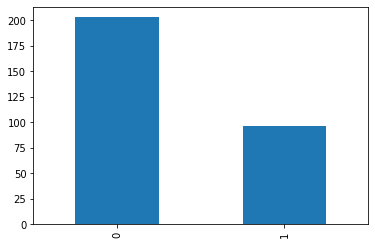

In [5]:
## data distribution in the target class ##
pd.value_counts(data['DEATH_EVENT']).plot.bar()

In [6]:
## Anaemia ##
ds = data['anaemia'].value_counts().reset_index()
ds.columns = ['anaemia', 'count']
fig = px.bar(ds, x='anaemia', y="count", orientation='v', title='Count of Patients with Anaemia', width=500)
fig.show()

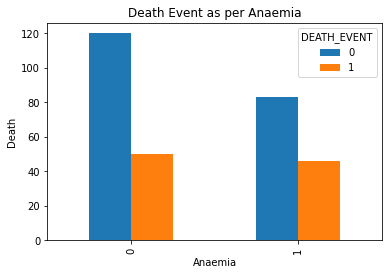

In [7]:
### Death Event as per Anaemia ##
pd.crosstab(data.anaemia  ,data.DEATH_EVENT).plot(kind='bar')
plt.title('Death Event as per Anaemia')
plt.xlabel('Anaemia')
plt.ylabel('Death')
plt.show()

In [8]:
## Smoking bar chart ##
ds = data['smoking'].value_counts().reset_index()
ds.columns = ['smoking', 'count']
fig = px.bar(ds, x='smoking', y="count", orientation='v', title='Count of Patients who Smoke', width=500)
fig.show()

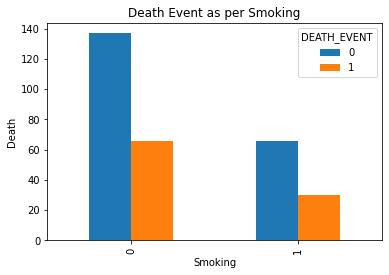

In [9]:
## Death Event as per Smoking ##
pd.crosstab(data.smoking ,data.DEATH_EVENT).plot(kind='bar')
plt.title('Death Event as per Smoking')
plt.xlabel('Smoking')
plt.ylabel('Death')
plt.show()

In [10]:
## high_blood_pressure bar chart ##
ds = data['high_blood_pressure'].value_counts().reset_index()
ds.columns = ['high_blood_pressure', 'count']
fig = px.bar(ds, x='high_blood_pressure', y="count", orientation='v', title='Count of Patients with high blood pressure', width=500)
fig.show()

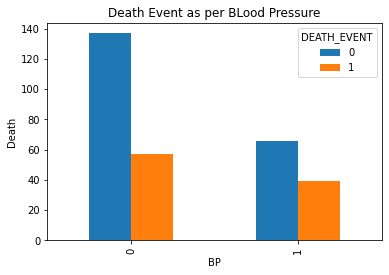

In [11]:
## Death Event as per BLood Pressure ##
pd.crosstab(data.high_blood_pressure  ,data.DEATH_EVENT).plot(kind='bar')
plt.title('Death Event as per BLood Pressure')
plt.xlabel('BP')
plt.ylabel('Death')
plt.show()

In [12]:
## diabetes bar chart ##
ds = data['diabetes'].value_counts().reset_index()
ds.columns = ['diabetes', 'count']
fig = px.bar(ds, x='diabetes', y="count", orientation='v', title='Count of Patients with diabetes', width=500)
fig.show()

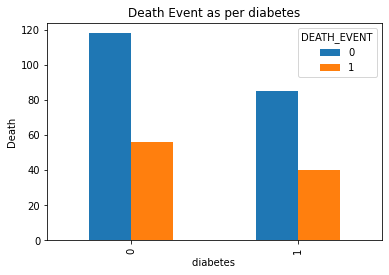

In [13]:
## Death Event as per diabetes ##
pd.crosstab(data.diabetes ,data.DEATH_EVENT).plot(kind='bar')
plt.title('Death Event as per diabetes')
plt.xlabel('diabetes ')
plt.ylabel('Death')
plt.show()

In [14]:
## sex bar chart ##
ds = data['sex'].value_counts().reset_index()
ds.columns = ['sex', 'count']
fig = px.bar(ds, x='sex', y="count", orientation='v', title='Count of Patients according to sex', width=500)
fig.show()

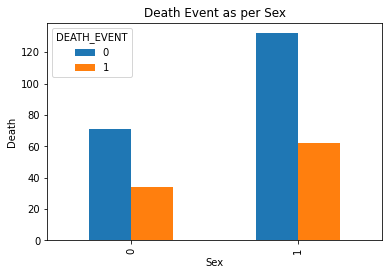

In [15]:
## Death Event as per Sex ##
pd.crosstab(data.sex ,data.DEATH_EVENT).plot(kind='bar')
plt.title('Death Event as per Sex')
plt.xlabel('Sex')
plt.ylabel('Death')
plt.show()

In [16]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Histogram(
    x = data['age'],
    xbins=dict( 
        start=40,
        end=95,
        size=2
    ),
    marker_color='#e8ab60',
    opacity=1
))

fig.update_layout(
    title_text='AGE DISTRIBUTION',
    xaxis_title_text='AGE',
    yaxis_title_text='COUNT', 
    bargap=0.05,
    xaxis =  {'showgrid': False },
    yaxis = {'showgrid': False }
)

fig.show()

In [17]:
import plotly.express as px
fig = px.histogram(data, x="age", color="DEATH_EVENT", hover_data=data.columns, 
                   title ="Distribution of AGE Vs DEATH_EVENT", 
                   labels={"age": "AGE"},
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"}
                  )
fig.show()

In [18]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Histogram(
    x = data['creatinine_phosphokinase'],
    xbins=dict( 
        start=23,
        end=582,
        size=15
    ),
    marker_color='#FE6F5E',
    opacity=1
))

fig.update_layout(
    title_text='CREATININE PHOSPHOKINASE DISTRIBUTION',
    xaxis_title_text='CREATININE PHOSPHOKINASE',
    yaxis_title_text='COUNT', 
    bargap=0.05, 
    xaxis =  {'showgrid': False },
    yaxis = {'showgrid': False }
)

fig.show()

In [19]:
import plotly.express as px
fig = px.histogram(data, x="creatinine_phosphokinase", color="DEATH_EVENT", hover_data=data.columns,
                   title ="Distribution of CREATININE PHOSPHOKINASE Vs DEATH_EVENT", 
                   labels={"creatinine_phosphokinase": "CREATININE PHOSPHOKINASE"},
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"})
fig.show()

In [20]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Histogram(
    x = data['ejection_fraction'],
    xbins=dict( 
        start=14,
        end=80,
        size=2
    ),
    marker_color='#A7F432',
    opacity=1
))

fig.update_layout(
    title_text='EJECTION FRACTION DISTRIBUTION',
    xaxis_title_text='EJECTION FRACTION',
    yaxis_title_text='COUNT', 
    bargap=0.05, 
    xaxis =  {'showgrid': False },
    yaxis = {'showgrid': False }
)

fig.show()

In [21]:
import plotly.express as px
fig = px.histogram(data, x="ejection_fraction", color="DEATH_EVENT",hover_data=data.columns,
                   title ="Distribution of EJECTION FRACTION Vs DEATH_EVENT", 
                   labels={"ejection_fraction": "EJECTION FRACTION"},
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"})
fig.show()

In [22]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Histogram(
    x = data['platelets'],
    xbins=dict( 
        start=25000,
        end=300000,
        size=5000
    ),
    marker_color='#50BFE6',
    opacity=1
))

fig.update_layout(
    title_text='PLATELETS DISTRIBUTION',
    xaxis_title_text='PLATELETS',
    yaxis_title_text='COUNT', 
    bargap=0.05, 
    xaxis =  {'showgrid': False },
    yaxis = {'showgrid': False }
)

fig.show()


In [23]:
import plotly.express as px
fig = px.histogram(data, x="platelets", color="DEATH_EVENT", hover_data=data.columns,
                   title ="Distribution of PLATELETS Vs DEATH_EVENT", 
                   labels={"platelets": "PLATELETS"},
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"})
fig.show()

In [24]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Histogram(
    x = data['serum_creatinine'],
    xbins=dict( 
        start=0.5,
        end=9.4,
        size=0.2
    ),
    marker_color='#E77200',
    opacity=1
))

fig.update_layout(
    title_text='SERUM CREATININE DISTRIBUTION',
    xaxis_title_text='SERUM CREATININE',
    yaxis_title_text='COUNT', 
    bargap=0.05, 
    xaxis =  {'showgrid': False },
    yaxis = {'showgrid': False }
)

fig.show()

In [25]:
import plotly.express as px
fig = px.histogram(data, x="serum_creatinine", color="DEATH_EVENT", hover_data=data.columns,
                   title ="Distribution of SERUM CREATININE Vs DEATH_EVENT", 
                   labels={"serum_creatinine": "SERUM CREATININE"},
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"})
fig.show()

In [26]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Histogram(
    x = data['serum_sodium'],
    xbins=dict( 
        start=113,
        end=148,
        size=1
    ),
    marker_color='#AAF0D1',
    opacity=1
))

fig.update_layout(
    title_text='SERUM SODIUM DISTRIBUTION',
    xaxis_title_text='SERUM SODIUM',
    yaxis_title_text='COUNT', 
    bargap=0.05, 
    xaxis =  {'showgrid': False },
    yaxis = {'showgrid': False }
)

fig.show()

In [27]:
import plotly.express as px
fig = px.histogram(data, x="serum_sodium", color="DEATH_EVENT",hover_data=data.columns,
                   title ="Distribution of SERUM SODIUM Vs DEATH_EVENT", 
                   labels={"serum_sodium": "SERUM SODIUM"},
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"})
fig.show()

In [28]:
import plotly.express as px
fig = px.histogram(data, x="age", color="diabetes",hover_data=data.columns,
                   title ="Distribution of AGE Vs DIABETES", 
                   labels={"diabetes": "DIABETES", "age": "AGE"},
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"})
fig.show()

In [29]:
import plotly.express as px
fig = px.histogram(data, x="age", color="high_blood_pressure",hover_data=data.columns,
                   title ="Distribution of AGE Vs HIGH BLOOD PRESSURE", 
                   labels={"high_blood_pressure": "HIGH BLOOD PRESSURE", "age": "AGE"},
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"})
fig.show()

In [30]:
import plotly.express as px
fig = px.histogram(data, x="age", color="anaemia",hover_data=data.columns,
                   title ="Distribution of AGE Vs ANAEMIA", 
                   labels={"anaemia": "ANAEMIA", "age": "AGE"},
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"})
fig.show()

In [31]:
import plotly.express as px
fig = px.histogram(data, x="age", color="smoking",hover_data=data.columns,
                   title ="Distribution of AGE Vs SMOKING", 
                   labels={"smoking": "SMOKING", "age": "AGE"},
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"})
fig.show()

In [32]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

d1 = data[(data["DEATH_EVENT"]==0) & (data["sex"]==1)]
d2 = data[(data["DEATH_EVENT"]==1) & (data["sex"]==1)]
d3 = data[(data["DEATH_EVENT"]==0) & (data["sex"]==0)]
d4 = data[(data["DEATH_EVENT"]==1) & (data["sex"]==0)]

label1 = ["Male","Female"]
label2 = ['Male - Survived','Male - Died', "Female -  Survived", "Female - Died"]
values1 = [(len(d1)+len(d2)), (len(d3)+len(d4))]
values2 = [len(d1),len(d2),len(d3),len(d4)]

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=label1, values=values1, name="GENDER"),
              1, 1)
fig.add_trace(go.Pie(labels=label2, values=values2, name="GENDER VS DEATH_EVENT"),
              1, 2)

fig.update_traces(hole=.4, hoverinfo="label+percent")

fig.update_layout(
    title_text="GENDER DISTRIBUTION IN THE DATASET  \
                   GENDER VS DEATH_EVENT",
    annotations=[dict(text='GENDER', x=0.19, y=0.5, font_size=10, showarrow=False),
                 dict(text='GENDER VS DEATH_EVENT', x=0.84, y=0.5, font_size=9, showarrow=False)],
    autosize=False,width=1200, height=500, paper_bgcolor="white")

fig.show()

In [33]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

d1 = data[(data["DEATH_EVENT"]==0) & (data["diabetes"]==0)]
d2 = data[(data["DEATH_EVENT"]==0) & (data["diabetes"]==1)]
d3 = data[(data["DEATH_EVENT"]==1) & (data["diabetes"]==0)]
d4 = data[(data["DEATH_EVENT"]==1) & (data["diabetes"]==1)]

label1 = ["No Diabetes","Diabetes"]
label2 = ['No Diabetes - Survived','Diabetes - Survived', "No Diabetes -  Died", "Diabetes  - Died"]
values1 = [(len(d1)+len(d3)), (len(d2)+len(d4))]
values2 = [len(d1),len(d2),len(d3),len(d4)]

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=label1, values=values1, name="DIABETES"),
              1, 1)
fig.add_trace(go.Pie(labels=label2, values=values2, name="DIABETES VS DEATH_EVENT"),
              1, 2)

fig.update_traces(hole=.4, hoverinfo="label+percent")

fig.update_layout(
    title_text="DIABETES DISTRIBUTION IN THE DATASET \
                  DIABETES VS DEATH_EVENT",
    annotations=[dict(text='DIABETES', x=0.20, y=0.5, font_size=10, showarrow=False),
                 dict(text='DIABETES VS DEATH_EVENT', x=0.84, y=0.5, font_size=8, showarrow=False)],
    autosize=False,width=1200, height=500, paper_bgcolor="white")
fig.show()

In [34]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

d1 = data[(data["DEATH_EVENT"]==0) & (data["smoking"]==0)]
d2 = data[(data["DEATH_EVENT"]==1) & (data["smoking"]==0)]
d3 = data[(data["DEATH_EVENT"]==0) & (data["smoking"]==1)]
d4 = data[(data["DEATH_EVENT"]==1) & (data["smoking"]==1)]

label1 = ["No Smoking","Smoking"]
label2 = ['No Smoking - Survived','No Smoking - Died', "Smoking - Survived", "Smoking - Died"]
values1 = [(len(d1)+len(d2)), (len(d3)+len(d4))]
values2 = [len(d1),len(d2),len(d3),len(d4)]

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=label1, values=values1, name="SMOKING"),
              1, 1)
fig.add_trace(go.Pie(labels=label2, values=values2, name="SMOKING VS DEATH_EVENT"),
              1, 2)

fig.update_traces(hole=.4, hoverinfo="label+percent")

fig.update_layout(
    title_text="SMOKING DISTRIBUTION IN THE DATASET \
                  SMOKING VS DEATH_EVENT",
    annotations=[dict(text='SMOKING', x=0.20, y=0.5, font_size=10, showarrow=False),
                 dict(text='SMOKING VS DEATH_EVENT', x=0.84, y=0.5, font_size=8, showarrow=False)],
    autosize=False,width=1200, height=500, paper_bgcolor="white")
fig.show()